In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
from src.model import load_model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       549
           1       0.89      0.82      0.86       342

    accuracy                           0.89       891
   macro avg       0.89      0.88      0.89       891
weighted avg       0.89      0.89      0.89       891



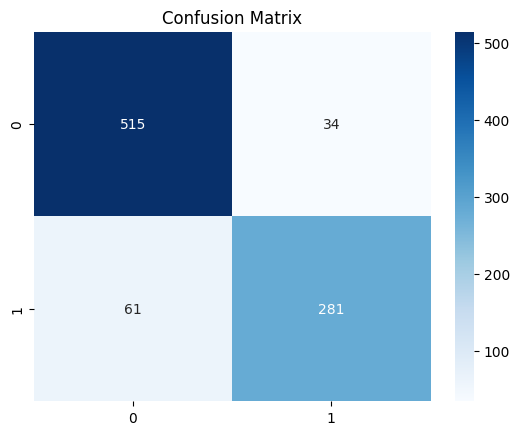

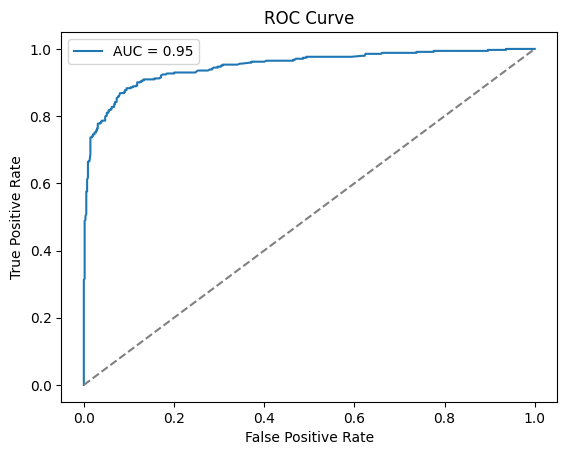

In [ ]:

data = pd.read_csv("../data/processed/cleaned_titanic.csv")

X = data.drop(columns=["Survived","Name"])
y = data["Survived"]


model = load_model("../models/final_model.pkl")

y_pred = model.predict(X)


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("Classification Report:\n", classification_report(y, y_pred))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("../reports/figures/confusion_matrix.png")
plt.show()

# ROC Curve
probs = model.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, probs)
fpr, tpr, _ = roc_curve(y, probs)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("../reports/figures/ROC curve.png")
plt.show()
